## K-means clustering on Yahoo data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import  Data

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot  as plt
import seaborn as sns

In [ ]:
# import Data
col_names=['Date', 'A', 'B', 'C','D','E']
data = pd.read_csv(r"yahoo.csv", names=col_names)

In [ ]:
data.head()

,Date,A,B,C,D,E
0,2002-01-03,18.700001,19.290001,18.540001,9.565,up
1,2002-01-04,19.000000,19.809999,18.530001,9.450,down
2,2002-01-07,18.700001,19.940001,18.650000,9.865,up
3,2002-01-08,19.400000,19.730000,19.250000,9.765,down
4,2002-01-09,19.799999,21.350000,19.770000,10.125,up


In [ ]:
data.dtypes

Date     object
A       float64
B       float64
C       float64
D       float64
E        object
dtype: object

In [ ]:
# code the variable E as 0 when up and 1 when down
import numpy as np

data['E'] = np.where(data['E'] == "down", 1, 0)

In [ ]:
data.head()

,Date,A,B,C,D,E
0,2002-01-03,18.700001,19.290001,18.540001,9.565,0
1,2002-01-04,19.000000,19.809999,18.530001,9.450,1
2,2002-01-07,18.700001,19.940001,18.650000,9.865,0
3,2002-01-08,19.400000,19.730000,19.250000,9.765,1
4,2002-01-09,19.799999,21.350000,19.770000,10.125,0


In [ ]:
data.isnull().sum()

Date    0
A       0
B       0
C       0
D       0
E       0
dtype: int64

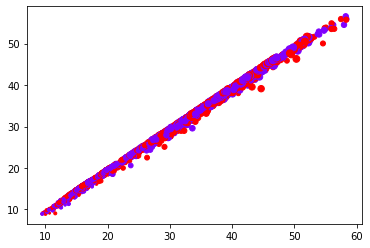

In [ ]:
X = data[["B","C","D","E"]]
#Visualise data points
plt.scatter(X["B"],X["C"],X["D"],X["E"],cmap='rainbow')

## Visualize Data

## Creating the Clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5)

In [ ]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Center of the clusters
kmeans.cluster_centers_

array([[16.1377413 , 15.59291554, 14.00134384,  0.5080429 ],
       [35.19402166, 34.32165402, 34.74582703,  0.49189189],
       [27.69510329, 26.86013367, 25.51391861,  0.49696233],
       [43.97209925, 43.08632044, 43.52659135,  0.48306998],
       [45.78378063, 44.36121945, 22.54399395,  0.48780488]])

In [ ]:
#predicted clusters
kmeans.labels_

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
kmeans.inertia_

103367.68753122847

# To Find the optimal values of K

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
Sum_of_squared_distances

[1354895.5967496806,
 372493.802393569,
 202970.14652444655,
 147625.78893649264,
 103367.93753943473,
 86108.41931286111,
 70870.99355513413,
 56793.314193500664,
 47481.691604393156,
 41223.776617787815,
 34951.68416830183,
 30192.088785728054,
 26745.995059838195,
 23324.225517313178]

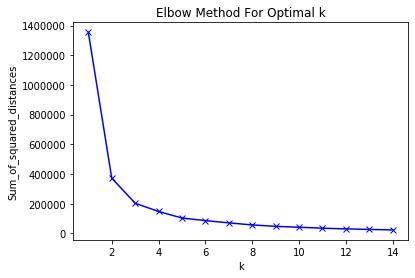

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()